# CodeClause-Task1

## Loan Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
data=pd.read_csv('Data/Loan_prediction.csv')

### display the first 5 rows of the dataset using head method

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Display the last 5 rows of the dataset using tail method

In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### Display the shape of the dataframe using shape attribute

In [6]:
data.shape

(614, 13)

In [7]:
print("No.of Rows:",data.shape[0])
print("No.of Columns:",data.shape[1])

No.of Rows: 614
No.of Columns: 13


### Display the statistics of the dataframe using describe method

#### only numerical

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### numeical and theoritical

In [9]:
data.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


### check whether there are any null values in the dataframe

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Display a heatmap to show the null values

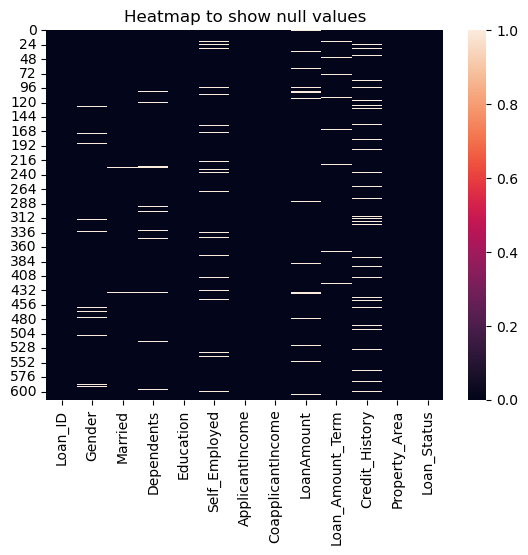

In [12]:
sea.heatmap(data.isnull())
plt.title("Heatmap to show null values")
plt.show()

### drop the null values

In [13]:
data=data.dropna()

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

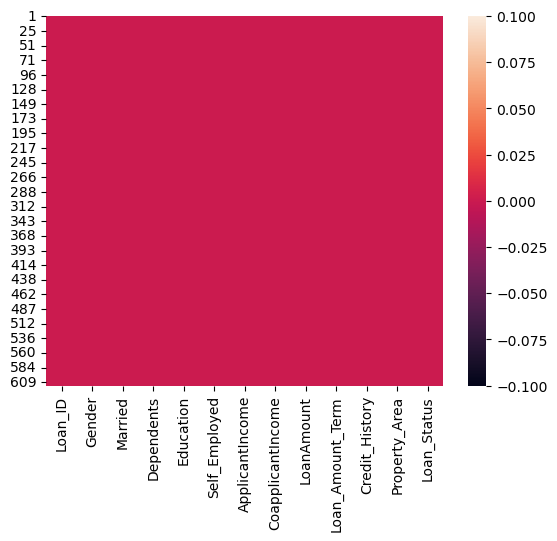

In [15]:
sea.heatmap(data.isnull())
plt.show()

In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [17]:
data.shape

(480, 13)

### display the count of each dependent

In [18]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [19]:
data=data.replace(to_replace='3+',value=4)

In [20]:
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Countplot to represent the count of dependents

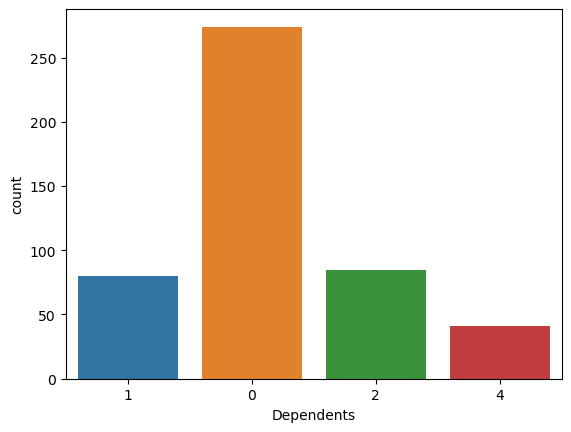

In [21]:
sea.countplot(x="Dependents",data=data)
plt.show()


### Countplot to represent the count of Loan status

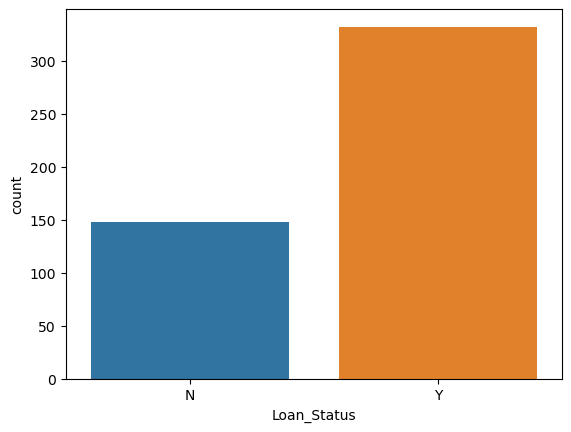

In [22]:
sea.countplot(x='Loan_Status',data=data)
plt.show()

### Display a histplot to represent the count of Applicant Income

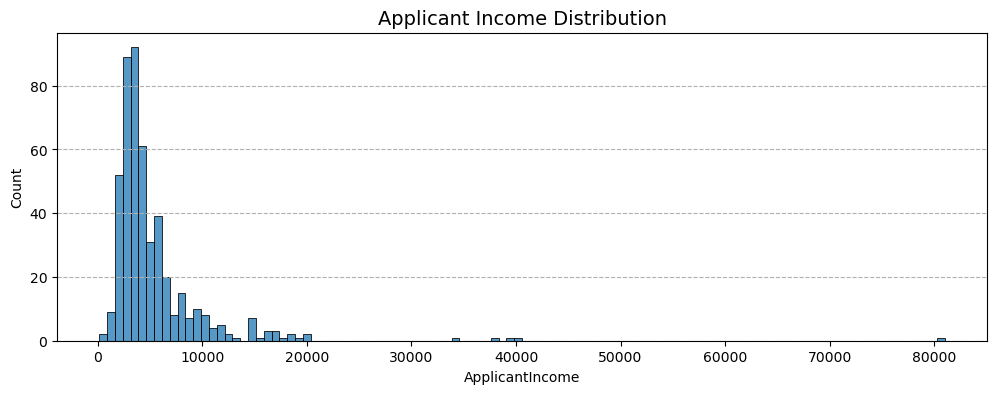

In [24]:
plt.figure(figsize=(12,4))
sea.histplot(x='ApplicantIncome', data=data)
plt.title('Applicant Income Distribution', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()

In [27]:
data['ApplicantIncome'].value_counts()

2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: ApplicantIncome, Length: 405, dtype: int64

### Display a histplot to show Loan amount

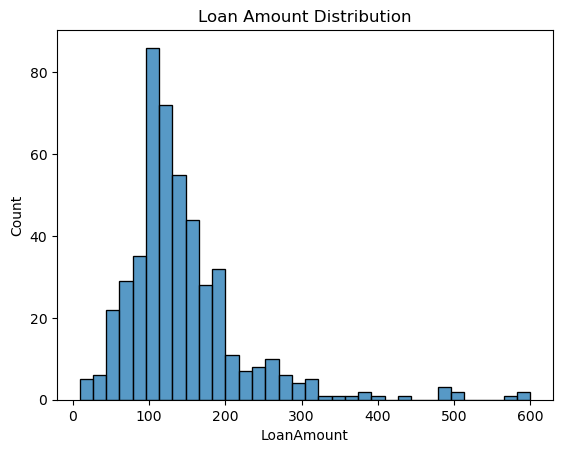

In [29]:
sea.histplot(x="LoanAmount",data=data)
plt.title("Loan Amount Distribution")
plt.show()

### Histplot to show the count of Education status according to Loan status

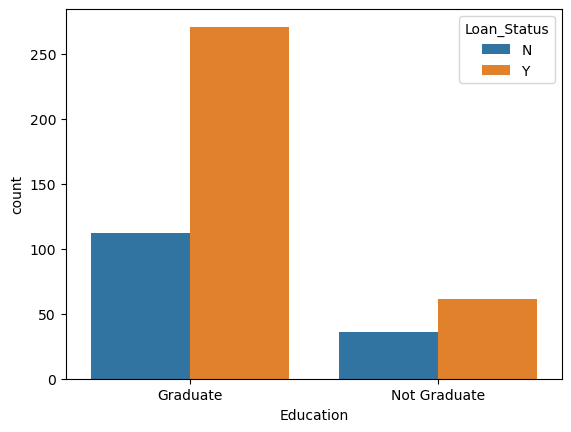

In [30]:
sea.countplot(x='Education',hue='Loan_Status',data=data)
plt.show()

### Histplot to show the count of marital status according to Loan status

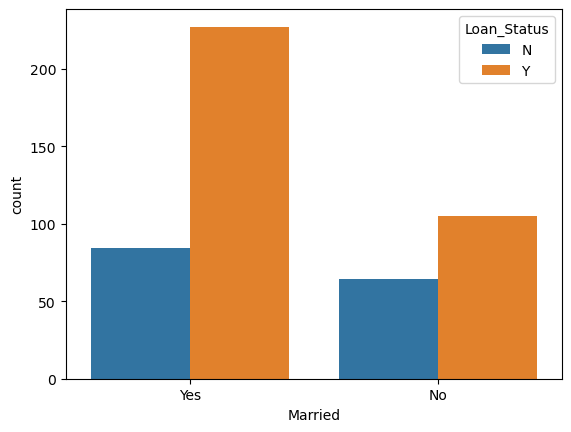

In [31]:
sea.countplot(x='Married',hue='Loan_Status',data=data)
plt.show()

### Histplot to show the count of Employement status according to Loan status

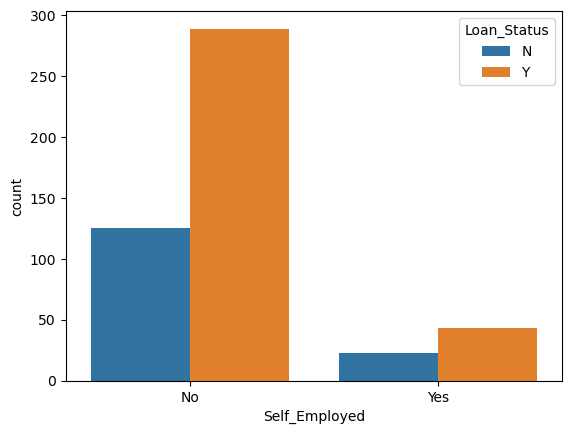

In [32]:
sea.countplot(x='Self_Employed',hue='Loan_Status',data=data)
plt.show()

### Histplot to show the count of property area status according to Loan status

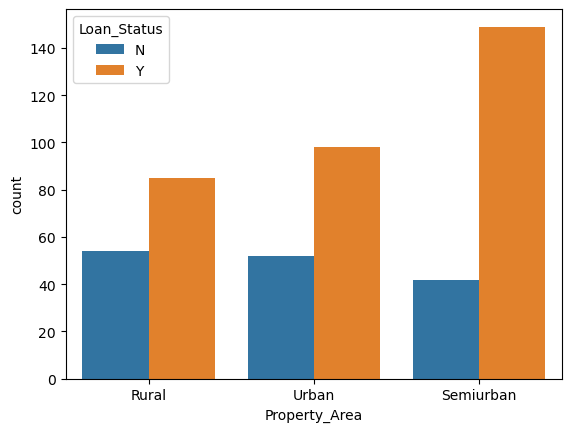

In [33]:
sea.countplot(x='Property_Area',hue='Loan_Status',data=data)
plt.show()

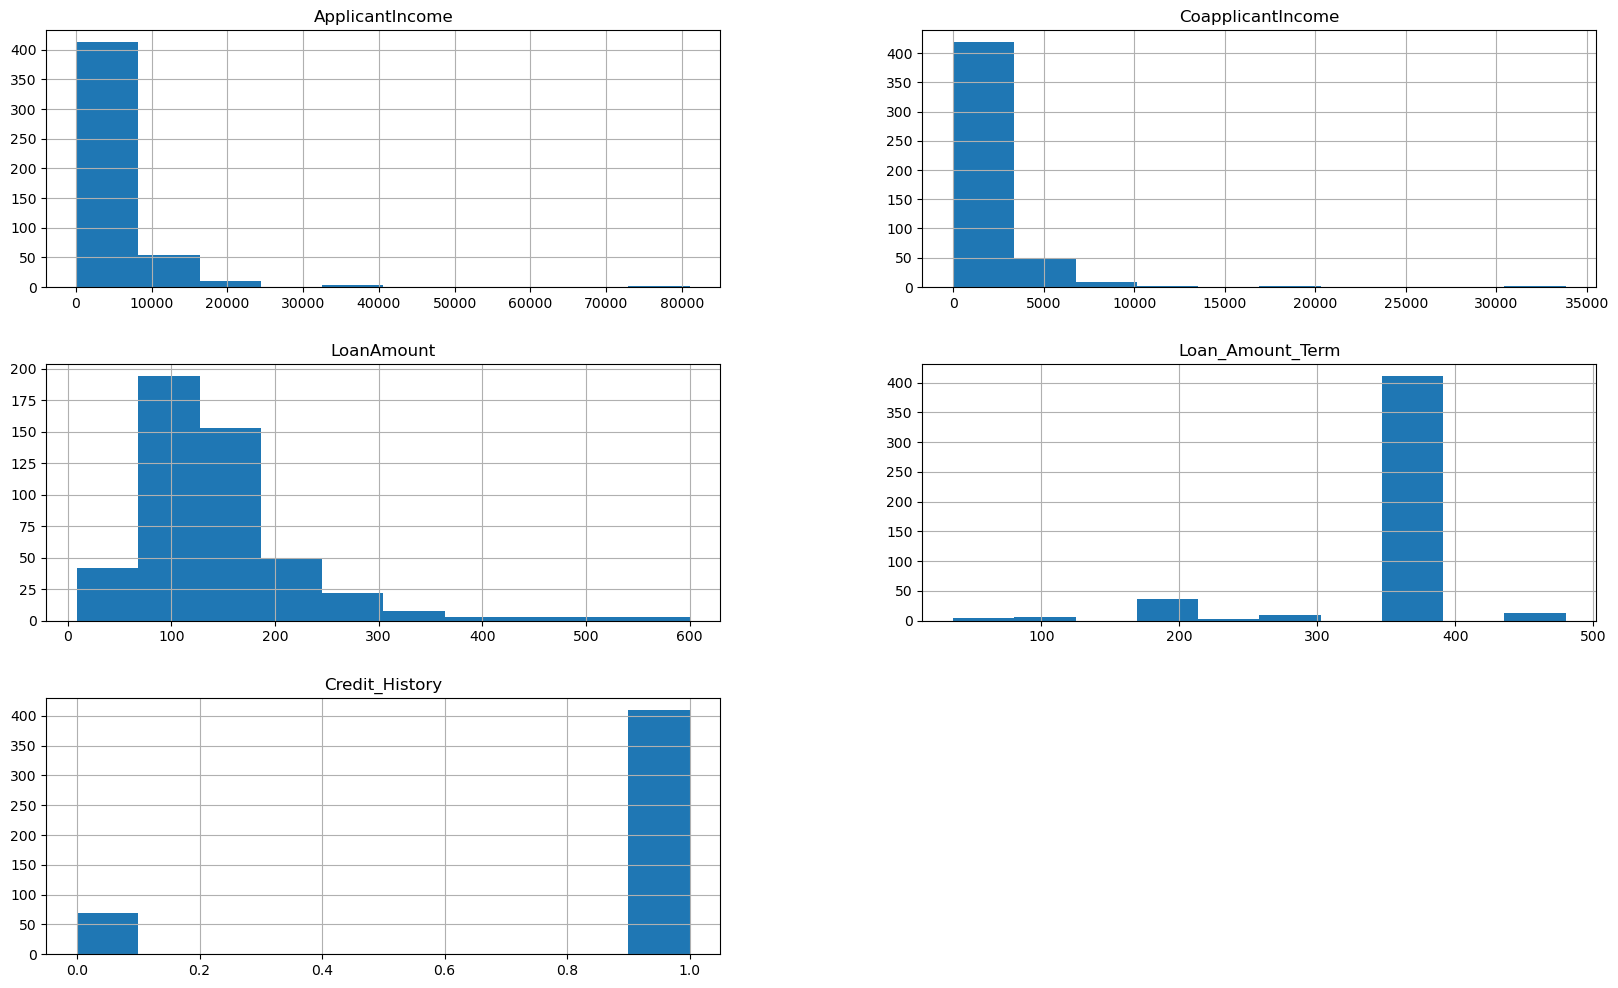

In [34]:
data.hist(figsize=(20,12))
plt.show()

### Replacement of values from strings to binary

In [35]:
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
             'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Loan_Status':{'N':0,'Y':1}},inplace=True)

### Display top 5 rows of dataframe after replacement

In [36]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


### Show a histplot after replacement

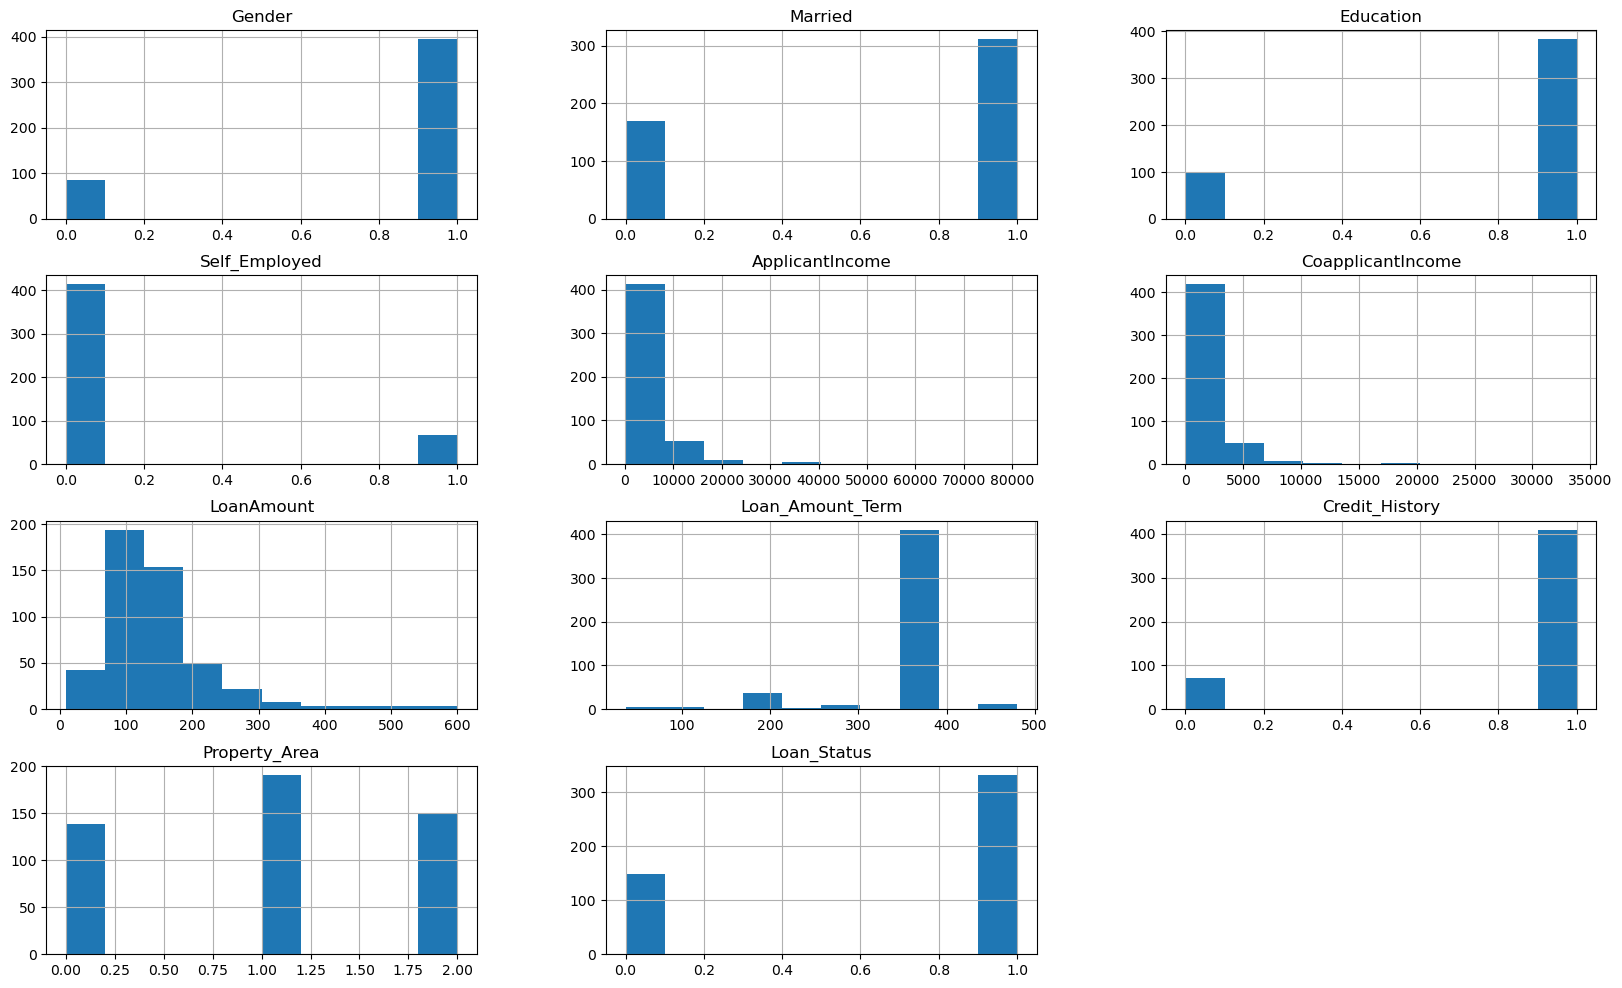

In [37]:
data.hist(figsize=(20,12))
plt.show()

### Correlation between the columns

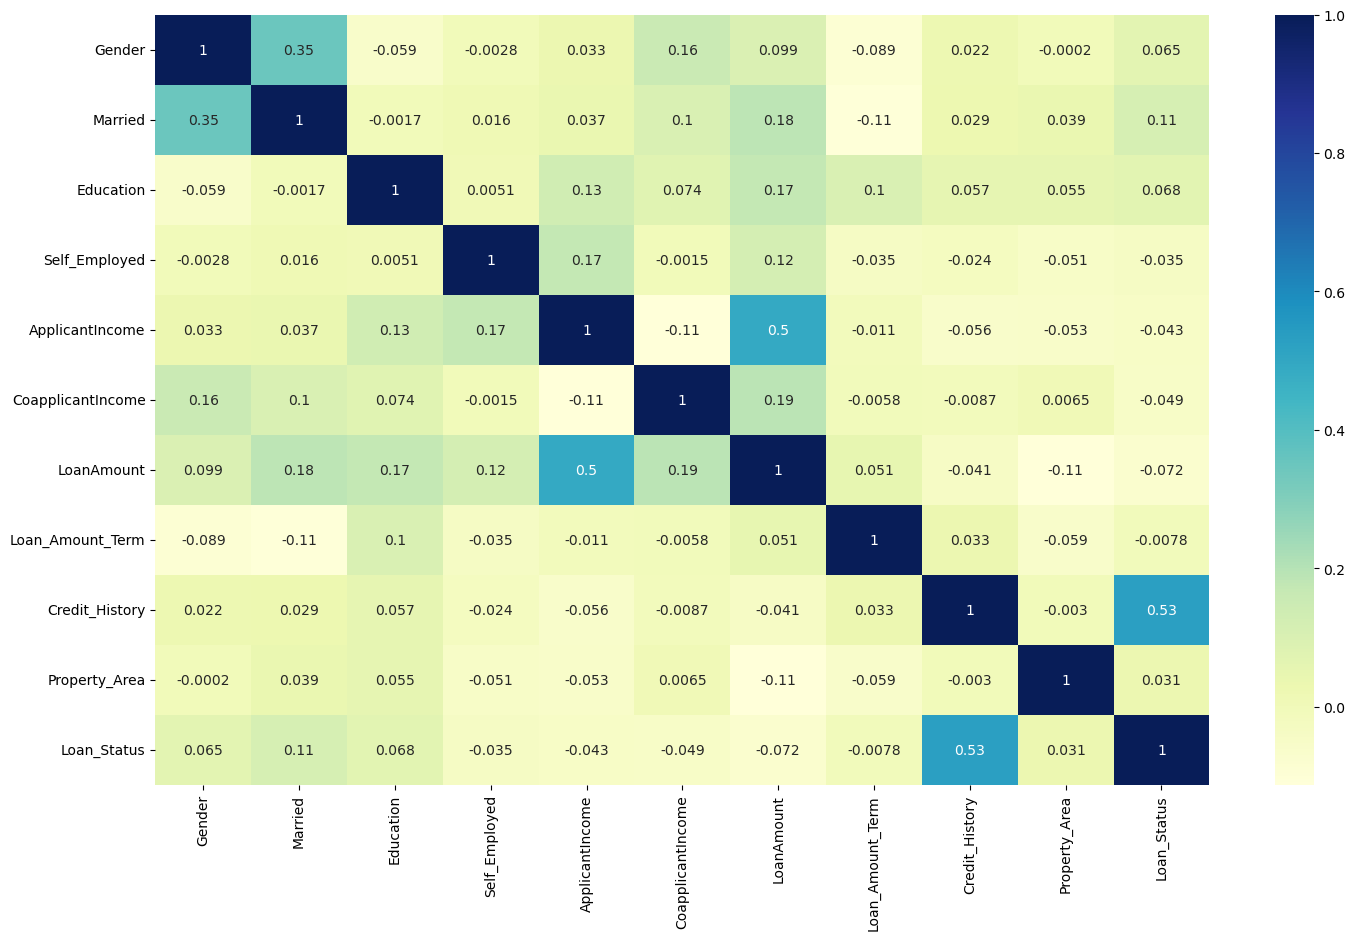

In [38]:
plt.figure(figsize=(17,10))
sea.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [39]:
X=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=data['Loan_Status']

In [40]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [41]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

### Splitting the data

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

### display the shape of the data after splitting

In [43]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


### training of the dataframe

In [44]:
classifier=svm.SVC(kernel='linear')

In [45]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Accuracy of the training dataset

In [46]:
X_train_pred=classifier.predict(X_train)
accuracy_train=accuracy_score(X_train_pred,Y_train)
print("Training accuracy:",accuracy_train)

Training accuracy: 0.7986111111111112


### Accuracy of the testing dataset

In [47]:
X_test_pred=classifier.predict(X_test)
accuracy_test=accuracy_score(X_test_pred,Y_test)
print("Testing accuracy:",accuracy_test)

Testing accuracy: 0.8333333333333334
